# **Proyecto Final**
## Algoritmos de clasificación 2
# ![](https://i.gifer.com/7ARb.gif)
Integrantes:


*   Esteban Nesci
*   Analía López
*   Alejandro Gómez Fernández
*   Rodrigo Robert

Proyecto: Análisis de sentimientos en Twitter: hepatitis.
ALgoritmos de clasificación
Sobre el dataset del proyecto final, realizar la creación e implementación de al menos uno de los algoritmos de clasificación vistos en la sesión de hoy (KNN, Random Forest,Regresión Logística).
>> Consigna:
● Implementar al menos uno de los algoritmos de clasificación vistos en la sesión de hoy con el dataset propuesto para el proyecto final del curso.
>> Recomendaciones:
● Basarse en los entregables anteriores para la resolución de la presente actividad.
● Realizar una comparación de los modelos obtenidos y su performance.
● Sería de mucha utilidad aplicar más de un método de clasificación.



In [ ]:
#Importamos las librerias y el dataset
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#accedo a los datos
df = pd.read_csv("hepatitis_tag.csv", lineterminator='\n')
df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest\r,Unnamed: 0.1,tweet.1,sentiment
0,0,1523479063272525824,1523479063272525824,2022-05-08 22:44:48 -03,2022-05-08,22:44:48,-300,49024508,onionweigher,Onion Weigher 🧅⚖️,...,NaN,NaN,[],NaN,NaN,NaN,\r,0,Tried to take my children to Chi-Chi's but it ...,0.0
1,1,1523479009694158848,1523418175878037504,2022-05-08 22:44:35 -03,2022-05-08,22:44:35,-300,2726837169,griffinjones25,GJ,...,NaN,NaN,"[{'screen_name': 'stargazeruk7', 'name': 'Nata...",NaN,NaN,NaN,\r,1,@stargazeruk7 Hep A like you mention is an ent...,0.0
2,2,1523478947115139072,1523478947115139072,2022-05-08 22:44:20 -03,2022-05-08,22:44:20,-300,1452730505787551750,ideallyanews,IdeallyaNews,...,NaN,NaN,[],NaN,NaN,NaN,\r,2,UK Health Safety Authority: No evidence linkin...,2.0
3,3,1523478841125048320,1523418175878037504,2022-05-08 22:43:55 -03,2022-05-08,22:43:55,-300,2726837169,griffinjones25,GJ,...,NaN,NaN,"[{'screen_name': 'stargazeruk7', 'name': 'Nata...",NaN,NaN,NaN,\r,3,@stargazeruk7 Autoimmune hepatitis cannot spre...,0.0
4,4,1523478649827078144,1523425745657245697,2022-05-08 22:43:09 -03,2022-05-08,22:43:09,-300,1467606239119089676,olganie35346372,Dine Nieves,...,NaN,NaN,"[{'screen_name': 'GovPierluisi', 'name': 'Gobe...",NaN,NaN,NaN,\r,4,@GovPierluisi La fé??? Usted sabe lo que es es...,0.0


In [ ]:
# df.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas.')

Este dataset tiene 50002 filas, y 40 columnas.


In [ ]:
# Visualizo el nombre de las columnas
df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url',
       'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest\r', 'Unnamed: 0.1', 'tweet.1', 'sentiment'],
      dtype='object')

In [ ]:
df2 = pd.DataFrame()
df2 = df[['sentiment','replies_count','retweets_count', 'likes_count']]

In [ ]:
# df2.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(df2.shape[0]) + ' filas, y ' + str(df2.shape[1]) + ' columnas.')

Este dataset tiene 50002 filas, y 4 columnas.


In [ ]:
# Visualizamos caracteristicas de las columnas
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sentiment       50002 non-null  float64
 1   replies_count   50002 non-null  int64  
 2   retweets_count  50002 non-null  int64  
 3   likes_count     50002 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB


In [ ]:
#  Visualizo las 20 primeras filas del DataFrame df2
df2.head(20)

,sentiment,replies_count,retweets_count,likes_count
0,0.0,0,0,0
1,0.0,0,0,0
2,2.0,0,0,0
3,0.0,0,0,0
4,0.0,0,0,0
5,0.0,0,0,0
6,0.0,1,0,0
7,0.0,1,0,0
8,0.0,0,0,0
9,2.0,0,1,1


                sentiment  replies_count  retweets_count  likes_count
sentiment        1.000000       0.027949        0.001232     0.005944
replies_count    0.027949       1.000000        0.588400     0.613709
retweets_count   0.001232       0.588400        1.000000     0.970830
likes_count      0.005944       0.613709        0.970830     1.000000


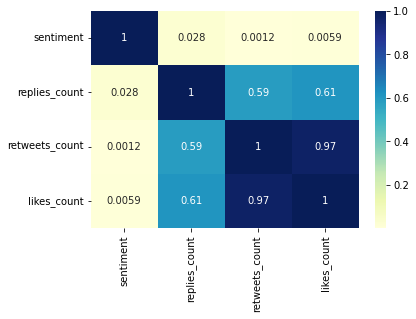

In [ ]:
print(df2.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

In [ ]:
# extraer caracteristicas y variables objetivo
X = df2.drop("sentiment", axis=1) #Elimino de mi dataset la variable a predecir
y = df2.sentiment #Defino el Target

In [ ]:
X

,replies_count,retweets_count,likes_count
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
49997,0,2,5
49998,0,0,0
49999,1,0,1
50000,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-0.08864567, -0.02976966, -0.03250667],
       [-0.08864567, -0.02976966, -0.03250667],
       [-0.08864567, -0.02976966, -0.03250667],
       ...,
       [ 0.00051892, -0.02976966, -0.03083781],
       [-0.08864567, -0.02976966, -0.03250667],
       [-0.08864567, -0.02976966, -0.02916895]])

In [ ]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

## ARBOL DE DECISIÓN 

Importamos el DecisionTreeClassifier desde el paquete sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier


Lo siguiente que se debe hacer es aplicar esto a los datos de entrenamiento. Para ello, se asigna el clasificador tree y se establece max_depth = 3 y ramdon_state = 42. El parámetro max_depth es la profundidad máxima del árbol, que controlamos para garantizar que no haya sobreajuste y que podamos seguir fácilmemte cómo se lorgó el resultado final. El parámetro random_state garantiza que los resultados se puedan replicar en análisis posteriores.


Luego ajustamos el algoritmo a los datos de entrenamiento:

In [ ]:
arbol = DecisionTreeClassifier(max_depth=3, random_state = 42) 
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_train_pred = arbol.predict(X_train) #Prediccion en Train
y_test_pred = arbol.predict(X_test) #Prediccion en Test

Queremos poder entender cómo se ha comportado el algoritmo, cuál de los aspectos positivos de usar un clasificador de árboles de decisión es que la salida es intuitiva de entender y se puede visualizar fácilmente.

Esto se puede hacer con un diagrama de árbol.


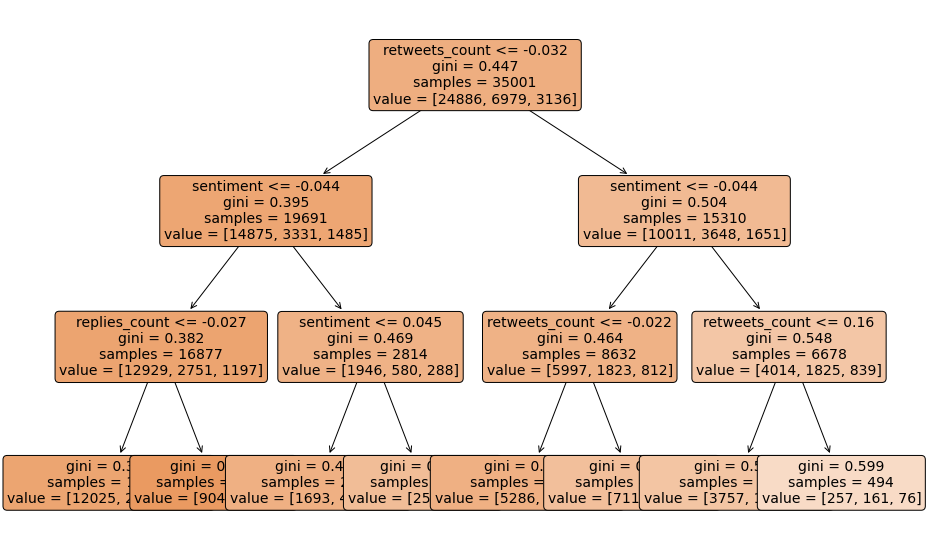

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10), facecolor ='w')
a = tree.plot_tree(arbol,
                   feature_names = df2.columns,
                   label='all',
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 71.10%
% de aciertos sobre el set de evaluación: 69.80%


Una precisión del 71,10% de aciertos en el conjunto de entrenamiento y una precisión del 69,80% de aciertos en el conjunto de prueba indican un sobreajuste.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82     10471
         1.0       0.00      0.00      0.00      3155
         2.0       0.00      0.00      0.00      1375

    accuracy                           0.70     15001
   macro avg       0.23      0.33      0.27     15001
weighted avg       0.49      0.70      0.57     15001



Aquí es importante señalar que no hay exactitud en 1 y 2. Es decir, el arbol solo acierta el 70% de las veces en sentimientos negativos. No acierta en sentimientos neutros y positivos. Creemos que eso se debe a que las clases están desbalanceadas.

In [ ]:
#Importamos librerias para graficar

import matplotlib.pyplot as plt
import seaborn as sns


Graficaremos cómo evoluciona la accuracy de los árboles a medida que va creciendo la profundidad del árbol.

In [ ]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

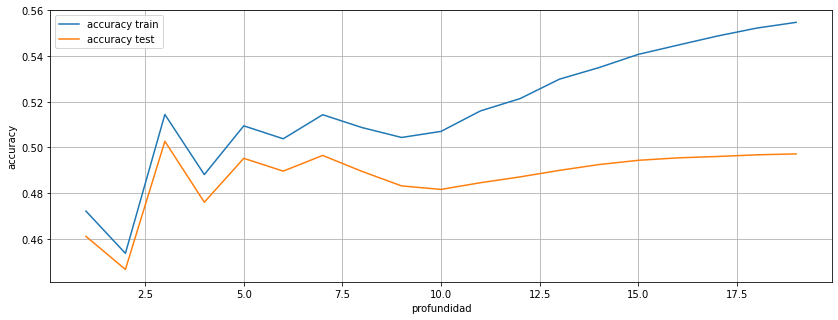

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
plt.grid()
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

En el gráfico anterior mostramos como va evolucionando la accuracy a medida que va creciendo la profundidad de los árboles. Como se puede ver, una vez que se llega a 18 de profundidad las curvas se aplanan. El arbol logra en una profundidad de 3 la misma performance que con 20 de profundidad. Entendemos que una accuracy máxima de 50% no es un buen resultado, dado que hay igual probabilidad ser uno y otro resultado, positivo, negativo o neutro.

In [ ]:
# veamos que pasa con un árbol sin corte de profundidad
np.random.seed(2021)
arbol = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0)
arbol.fit(X_train, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Exactitud en entrenamiento: %.3f' % accuracy_score(y_train,arbol.predict(X_train)))
print('Exactitud en test: %.3f' % accuracy_score(y_test,arbol.predict(X_test)))

Exactitud en entrenamiento: 0.739
Exactitud en test: 0.683


Aquí corremos el arbol con el hipeparametro de entropía, en lugar de Gini, pero no mejora sensiblemente el modelo.

### KNN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 70.62%
% de aciertos sobre el set de evaluación: 69.21%


Una precisión del 70.62% en el conjunto de entrenamiento y una precisión del 69.21% en el conjunto de prueba indican un sobreajuste.

Aquí abajo graficaremos la evolución de los modelos cambiando 2 hiperparámetros: el número de los k vecinos contra los pesos uniformes o ponderados por distancia:

In [ ]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
valores_k = list(range(1,50,4))
resultados_train_u = []
resultados_test_u  = []
resultados_train_w = []
resultados_test_w  = []

for k in valores_k:
    # instanciamos el modelo uniforme
    clf_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf_u.fit(X_train, y_train)
    y_train_pred = clf_u.predict(X_train)
    y_pred = clf_u.predict(X_test)
    resultados_train_u.append(accuracy_score(y_train, y_train_pred))
    resultados_test_u.append(accuracy_score(y_test, y_pred))

    clf_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf_w.fit(X_train, y_train)
    y_train_pred = clf_w.predict(X_train)
    y_pred = clf_w.predict(X_test)
    resultados_train_w.append(accuracy_score(y_train, y_train_pred))
    resultados_test_w.append(accuracy_score(y_test, y_pred))

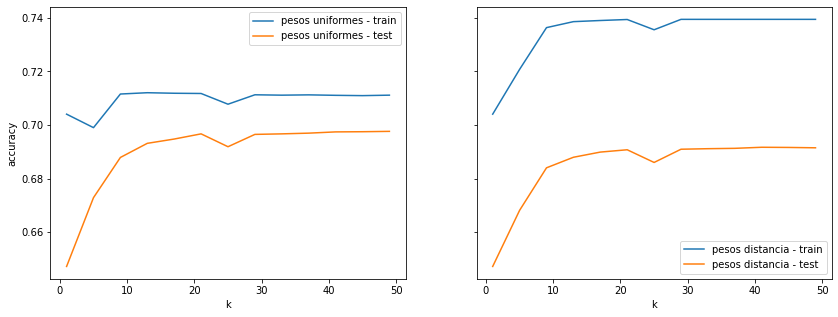

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
ax[0].set(xlabel='k',ylabel='accuracy');

ax[1].plot(valores_k, resultados_train_w, valores_k, resultados_test_w);
ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
ax[1].set(xlabel='k');

Como se ve, los dos modelos llegan prácticamente a su mejor rendimiento en k = 10. La diferencia está en que mientras los pesos uniformes llegan a 70/71, los pesos ponderados por distancia en entrenamiento funcionan mejor (llega a 74), pero en test empeora y queda en 69.

Aquí haremos un grid para testear cual es el modelo con mejores hiperparámetros:

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [ ]:
# ahora busquemos nuestro mejor modelo usando validacion cruzada y gridsearchcv pero incluyamos otra distancia!
model = KNeighborsClassifier()
n_neighbors = np.array([1,2,3,5,8,10,15,20,30,50])
param_grid = {'n_neighbors': n_neighbors, 
              'weights':['uniform', 'distance'], 
              'metric':['euclidean', 'chebyshev', 'manhattan']}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_).sample(3)

{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.014481,0.000193,0.578901,0.012041,chebyshev,3,distance,"{'metric': 'chebyshev', 'n_neighbors': 3, 'wei...",0.631767,0.645429,0.664000,0.693857,0.659286,0.658868,0.020813,52
52,0.015982,0.002583,0.749688,0.074366,manhattan,15,uniform,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.703899,0.709429,0.702143,0.706000,0.708714,0.706037,0.002771,10
58,0.014796,0.000474,0.748686,0.031711,manhattan,50,uniform,"{'metric': 'manhattan', 'n_neighbors': 50, 'we...",0.710327,0.710714,0.710857,0.710714,0.710571,0.710637,0.000179,1


Según el resultado el modelo con mejor resultado es: distancia Manhattan, k = 50, pesos uniformes.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50, weights='uniform', metric='manhattan')

knn.fit(X, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=50)

In [ ]:
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 71.09%
% de aciertos sobre el set de evaluación: 69.82%


Podemos constatar que el modelo mejora con respecto al primero que corrimos, pero no es una mejora sustancial.

### RANDOM FOREST

In [ ]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="sqrt")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=11)

In [ ]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 56.51%
% de aciertos sobre el set de evaluación: 50.76%


Una precisión del 56,51% de aciertos en el conjunto de entrenamiento y una precisión del 50,76% de aciertos en el conjunto de prueba indican un sobreajuste.

## REGRESION LOGISTICA

In [ ]:
#Entrenamos un modelo de regresión logística

# Paso 3: importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression()

In [ ]:
y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 71.09%
% de aciertos sobre el set de evaluación: 69.78%


Una precisión del 71,09% de aciertos en el conjunto de entrenamiento y una precisión del 69,78%de aciertos en el conjunto de prueba indican un sobreajuste.

### Conclusiones preliminares:

Todos los modelos tienen resultados muy parecidos entre 69% y 70% de accuracy, el único que queda por fuera de esos valores es el arbol de decisión, con un rendimiento menor.

Entendemos que los algoritmos llegan a un techo de 70% de accuracy si no disponen de los datos semánticos de los textos. Solo hemos usado los likes, retweets y respuestas. El paso de tokenización lo daremos en el próximo análisis y con eso esperamos subir el rendimiento de los modelos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1678f438-dd57-41c5-b88b-bfcde7b7ccb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>